In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Clone GitHithub repository

In [2]:
!git config --global user.email ericsun42@outlook.com
!git config --global user.name Erostrate9
!mkdir -p /root/.ssh && cp -r "/content/drive/My Drive/ssh/." /root/.ssh/
!ssh -T git@github.com


Hi Erostrate9! You've successfully authenticated, but GitHub does not provide shell access.


In [3]:
!git clone -b eric git@github.com:Erostrate9/Robust-MSCN.git

Cloning into 'Robust-MSCN'...
remote: Enumerating objects: 1348, done.
remote: Counting objects: 100% (1348/1348), done.
remote: Compressing objects: 100% (410/410), done.
remote: Total 1348 (delta 922), reused 1326 (delta 911), pack-reused 0 (from 0)
Receiving objects: 100% (1348/1348), 3.96 MiB | 8.29 MiB/s, done.
Resolving deltas: 100% (922/922), done.


In [ ]:
%%bash
cd /content/Robust-MSCN
cp "/content/drive/MyDrive/Colab Notebooks/Robust-MSCN.ipynb" Robust-MSCN.ipynb
git add .
git commit -m "Update dockerfile requirements & update Notebook"
git push origin eric

# Install Enviroment

In [4]:
import os
os.chdir('/content/Robust-MSCN')

In [ ]:
%%bash
cd Robust-MSCN
pip install -r requirements.txt

In [ ]:
%%bash
cd Robust-MSCN
pip install -r requirements.txt
pip install klepto
apt-get update
apt-get install -y libomp5 libomp-dev
ln -s /usr/lib/llvm-14/lib/libomp.so /usr/lib/x86_64-linux-gnu/libomp.so
ls /usr/lib/x86_64-linux-gnu/libomp.so
# Optional For some of the plan graph visualizations
apt-get install graphviz

## Download workload queries (dataset)

In [ ]:
%%bash
# download IMDB workload
cd Robust-MSCN
bash scripts/download_imdb_workload.sh

## PostgreSQL Configuration

- We use docker to install and configure PostgreSQL, and setup the relevant databases.

- Make sure that you have Docker installed appropriately for your system, with the docker daemon running.
- PostgreSQL requires a username, which we copy from an environement variable \$LCARD_USER while setting it up in docker. Similarly, set \$LCARD_PORT to the local port you want to use to connect to the PostgreSQL instance running in docker. Here are the commands to set it up:

- You cannot run docker daemon on Colab (at least not on the free version). Therefore, I recommend running docker locall

- You can run the following bash on your local environment (e.g., Mac) to build the docker image
```bash
cd docker
export LCARD_USER=ceb
export LCARD_PORT=5432
docker build --build-arg LCARD_USER=${LCARD_USER} -t pg12 .
docker save -o pg12.tar pg12
docker run -itd --shm-size=1g --name card-db -p ${LCARD_PORT}:5432 -d pg12
docker restart card-db
docker exec -it card-db /imdb_setup.sh
```
- Alternatively, you can use image that I uploaded:
```bash
docker pull erostrate9/pg12:latest
```


- To build Docker image on Mac, you need to add the clang dependency in Dockfile.

```
RUN apt-get update && apt-get install -y \
    clang \
    wget \
    tar \
    git \
    gcc \
    build-essential \
    postgresql-server-dev-12
```

```
# if your instance gets restarted / docker image gets shutdown
sudo docker restart card-db

# get a bash shell within the docker image
sudo docker exec -it card-db bash
# note that postgresql data on docker is stored at /var/lib/postgresql/data

# If you failed to run `docker exec -it card-db /imdb_setup.sh`
/imdb_setup.sh



# connect psql on your host to the postgresql server running on docker
psql -d imdb -h localhost -U imdb -p $LCARD_PORT
```


### Colab: Runnning Postgres without docker

In [46]:
!sudo apt-get -y -qq install postgresql

In [47]:
!sudo service postgresql start

 * Starting PostgreSQL 14 database server
   ...done.


In [49]:
!ls /var/lib/postgresql/

14  pg_imdb  pg_imdb.tar


In [ ]:
%%bash
export LCARD_USER=ceb
export LCARD_PORT=5432
export POSTGRES_USER postgres

createdb -U $POSTGRES_USER imdb
wget -O /var/lib/postgresql/pg_imdb.tar https://www.dropbox.com/s/vq1owleo9nuyxdf/pg_imdb.tar.gz?dl=1
tar xf /var/lib/postgresql/pg_imdb.tar -C /var/lib/postgresql/
ls /var/lib/postgresql/pg_imdb

In [ ]:
!sudo -u postgres psql -U postgres -c "CREATE ROLE imdb WITH SUPERUSER;"
!sudo -u postgres psql -U postgres -c "ALTER ROLE imdb WITH LOGIN;"
!sudo -u postgres psql -U postgres -c 'DROP DATABASE IF EXISTS imdb;'
!sudo -u postgres psql -U postgres -c 'CREATE DATABASE imdb;'
!pg_restore -v -d imdb /var/lib/postgresql/pg_imdb

CREATE ROLE
ALTER ROLE
DROP DATABASE
CREATE DATABASE
pg_restore: connecting to database for restore
pg_restore: creating SCHEMA "public"
pg_restore: while PROCESSING TOC:
pg_restore: from TOC entry 3; 2615 2200 SCHEMA public postgres
pg_restore: error: could not execute query: ERROR:  schema "public" already exists
Command was: CREATE SCHEMA public;


pg_restore: creating COMMENT "SCHEMA public"
pg_restore: creating EXTENSION "plpgsql"
pg_restore: creating COMMENT "EXTENSION plpgsql"
pg_restore: creating TABLE "public.aka_name"
pg_restore: creating TABLE "public.aka_title"
pg_restore: creating TABLE "public.cast_info"
pg_restore: creating TABLE "public.char_name"
pg_restore: creating TABLE "public.comp_cast_type"
pg_restore: creating TABLE "public.company_name"
pg_restore: creating TABLE "public.company_type"
pg_restore: creating TABLE "public.complete_cast"
pg_restore: creating TABLE "public.info_type"
pg_restore: creating TABLE "public.keyword"
pg_restore: creating TABLE "public.kind

### Colab udocker (not recommend)
It doesn't work. Please run docker locally.

In [ ]:
# Copyright 2024 Drengskapur
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
#
# @title {display-mode:"form"}
# @markdown <br/><br/><center><img src="https://cdn.jsdelivr.net/gh/drengskapur/docker-in-colab/assets/docker.svg" height="150"><img src="https://cdn.jsdelivr.net/gh/drengskapur/docker-in-colab/assets/colab.svg" height="150"></center><br/>
# @markdown <center><h1>Docker in Colab</h1></center><center>github.com/drengskapur/docker-in-colab<br/><br/><br/><b>udocker("run hello-world")</b></center><br/>
def udocker_init():
    import os
    if not os.path.exists("/home/user"):
        !pip install udocker > /dev/null
        !udocker --allow-root install > /dev/null
        !useradd -m user > /dev/null
    print(f'Docker-in-Colab 1.1.0\n')
    print(f'Usage:     udocker("--help")')
    print(f'Examples:  https://github.com/indigo-dc/udocker?tab=readme-ov-file#examples')

    def execute(command: str):
        user_prompt = "\033[1;32muser@pc\033[0m"
        print(f"{user_prompt}$ udocker {command}")
        !su - user -c "udocker $command"

    return execute

udocker = udocker_init()

In [6]:
%%bash
cd Robust-MSCN/docker
export LCARD_USER=ceb
export LCARD_PORT=5432

In [45]:
%%bash
udocker --allow-root pull erostrate9/pg12
udocker --allow-root create erostrate9/pg12
udocker --allow-root run erostrate9/pg12 /imdb_setup.sh

Info: downloading layer sha256:3163723c92e82e79f9a524cc925b58e4161f852474a4c375a9d1615343aa7789
Info: downloading layer sha256:7669119a765bdb3be269e80a1ad736abba05b9a8c19cc685502c964b918f5d01
Info: downloading layer sha256:102297bcba73fb6f48819877fe48edc8df0abe2d83bc7d05d35eff3d7e161b70
Info: downloading layer sha256:99821d3cfbb1637ae9cf1c9c41b942ad446a77e626af3b9b300bf0ade590c743
Info: downloading layer sha256:a663d58bba88684270f42bc69e48ca8a819ae3f932ef2427022472206a6d83ef
Info: downloading layer sha256:f96bbdeada86328b8c7fba5e8e7e556b31b29a7136dbde2830bbca6ca2922db6
Info: downloading layer sha256:82f03eefbc068c2b372a4db4c6faf91d7d28af03bbf8cde104f1ee9bd1ec90a1
Info: downloading layer sha256:009516957a9037a7ad8c01c4e267f369aee378fbbfe1fd1240d349b298f99ad2
Info: downloading layer sha256:af34b4497e5a2b2857e3eef07171510152efd8c8cd82763646fa8641df785315
Info: downloading layer sha256:4913375850dfb45862524e6b8ac9cc49d042d5d96f1bc339b6827883a516de89
Info: downloading layer sha256:7391f377f

CalledProcessError: Command 'b'udocker --allow-root pull erostrate9/pg12\nudocker --allow-root create erostrate9/pg12\nudocker --allow-root run erostrate9/pg12 /imdb_setup.sh\n'' returned non-zero exit status 255.

# Background
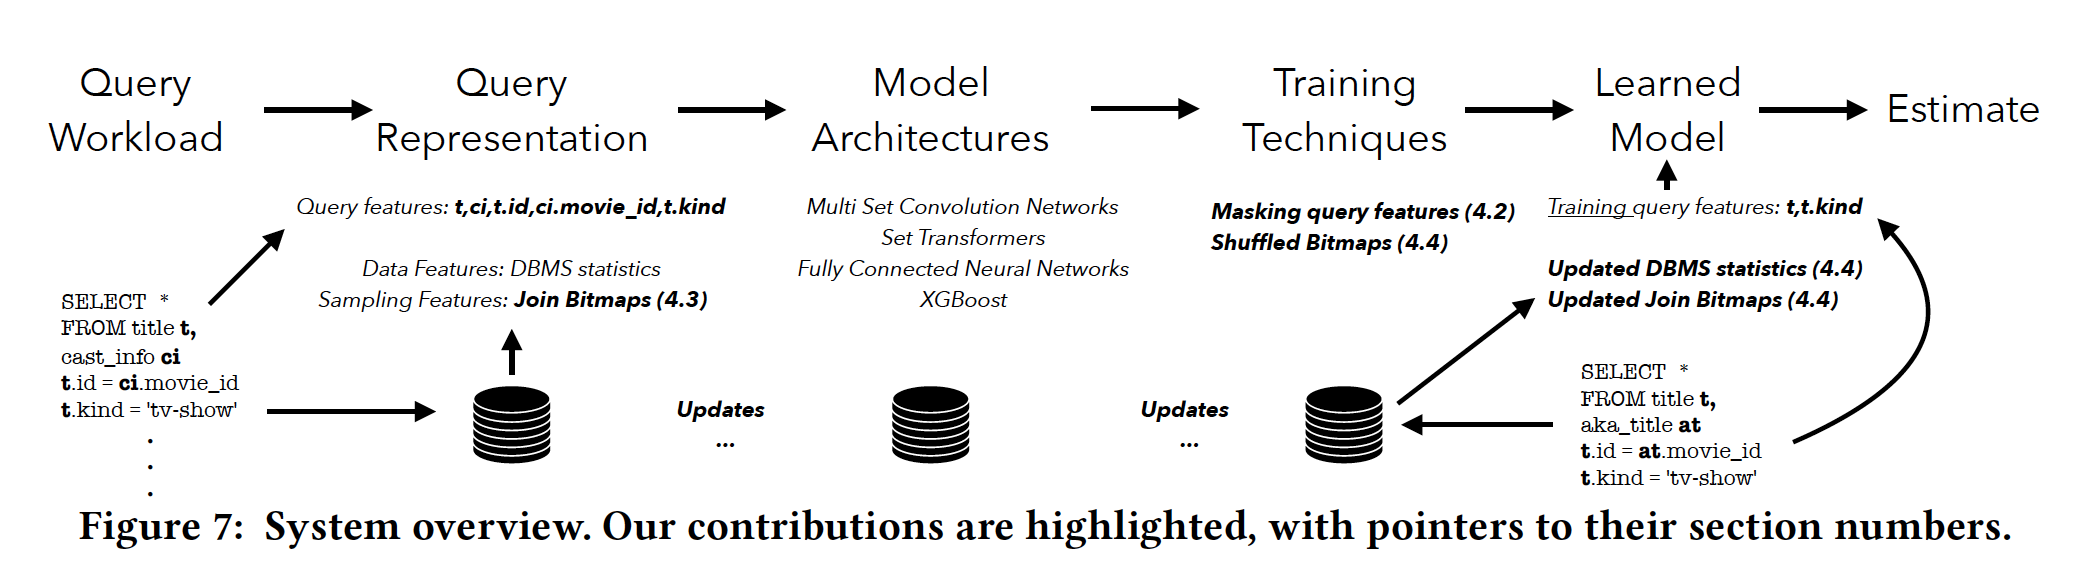

## Query Masking


## Join Bitmaps

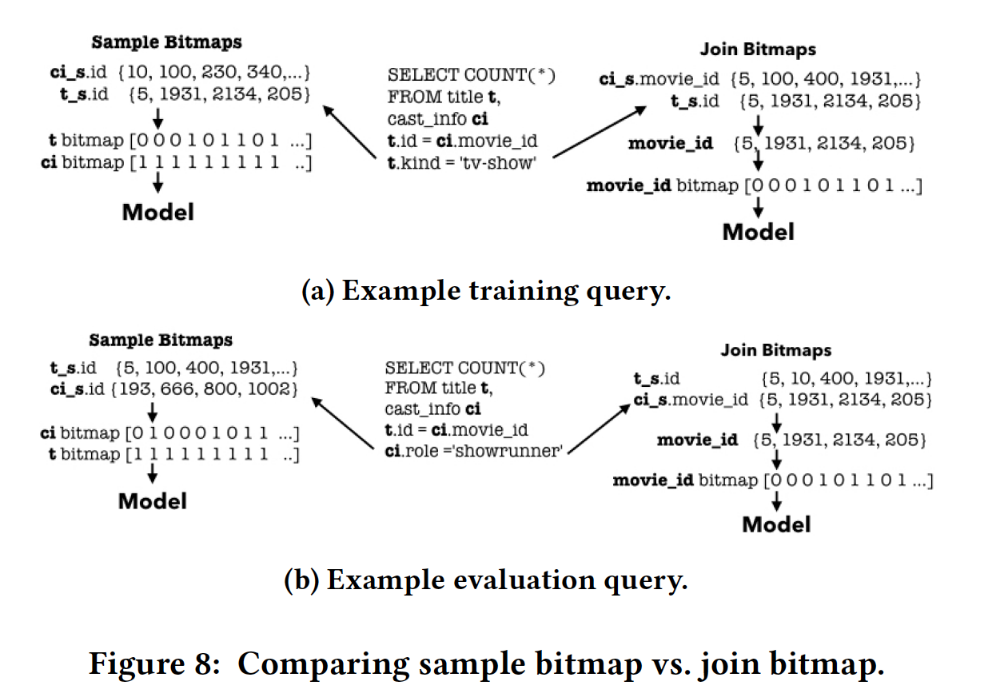

# Details

## Query Format
- First, let us explore the basic properties of the queries that we store:
- Each folder in queries/ is a workload that consists of pkl files. Each pkl file store a single query.
  - e.g., in `queries/joblight_train/joblight-train-all/0.pkl`
  ```
Query has 3 tables, 2 joins, 6 subplans.
Tables:
title t
movie_companies mc
movie_info mi
Joins:
t.id = mc.movie_id
t.id = mi.movie_id
Predicates:
t.production_year>1977
     Predicate column:  t.production_year
       Predicate type:  lt
     Predicate values:  [1977, None]
mc.company_id>71403
     Predicate column:  mc.company_id
       Predicate type:  lt
     Predicate values:  [71403, None]
mi.info_type_id<4
     Predicate column:  mi.info_type_id
       Predicate type:  lt
     Predicate values:  [None, 4]
  ```

In [7]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('/content/Robust-MSCN')
print('/content/Robust-MSCN' in sys.path)
import os
import numpy as np
import pandas as pd

from cardinality_estimation.featurizer import Featurizer

import glob
import random
import os
import json
import time
from collections import defaultdict

from IPython.display import HTML
from IPython.display import display_html
os.chdir('/content/Robust-MSCN')

True


In [8]:
from query_representation.query import *

qfn = "queries/joblight_train/joblight-train-all/0.pkl"
qrep = load_qrep(qfn)

# extract basic properties of the query representation format

print("""Query has {} tables, {} joins, {} subplans.""".format(
    len(qrep["join_graph"].nodes()), len(qrep["join_graph"].edges()),
    len(qrep["subset_graph"].nodes())))

tables, aliases = get_tables(qrep)

print("Tables: ")
for i,table in enumerate(tables):
    print(table, aliases[i])

print("Joins: ")
joins = get_joins(qrep)
print(("\n").join(joins))

preds, pred_cols, pred_types, pred_vals = get_predicates(qrep)
print("Predicates: ")
for i in range(len(preds)):
    for j, pred in enumerate(preds[i]):
        print(pred.strip(" "))
        print("     Predicate column: ", pred_cols[i][j])
        print("       Predicate type: ", pred_types[i][j])
        print("     Predicate values: ", pred_vals[i][j])

Query has 3 tables, 2 joins, 6 subplans.
Tables: 
title t
movie_companies mc
movie_info mi
Joins: 
t.id = mc.movie_id
t.id = mi.movie_id
Predicates: 
t.production_year>1977
     Predicate column:  t.production_year
       Predicate type:  lt
     Predicate values:  [1977, None]
mc.company_id>71403
     Predicate column:  mc.company_id
       Predicate type:  lt
     Predicate values:  [71403, None]
mi.info_type_id<4
     Predicate column:  mi.info_type_id
       Predicate type:  lt
     Predicate values:  [None, 4]


Next, we see how to access each of the subplans, and their cardinality estimates.

In [9]:
# from query_representation.utils import nx_graph_to_query
from query_representation.query import *

qfn = "queries/joblight_train/joblight-train-all/0.pkl"
qrep = load_qrep(qfn)

# for getting cardinality estimates of every subplan in the query
ests = get_postgres_cardinalities(qrep)
trues = get_true_cardinalities(qrep)

for k,v in ests.items():
    print("Subplan, joining tables: ", k)
    subsql = subplan_to_sql(qrep, k)
    print("Subplan SQL: ", subsql)
    print("   True cardinality: ", trues[k])
    print("PostgreSQL estimate: ", v)
    print("****************")

Subplan, joining tables:  ('t',)
Subplan SQL:  SELECT COUNT(*) FROM title AS t WHERE  t.production_year>1977
   True cardinality:  1976617
PostgreSQL estimate:  821888
****************
Subplan, joining tables:  ('mc',)
Subplan SQL:  SELECT COUNT(*) FROM movie_companies AS mc WHERE  mc.company_id>71403
   True cardinality:  568886
PostgreSQL estimate:  237434
****************
Subplan, joining tables:  ('mi',)
Subplan SQL:  SELECT COUNT(*) FROM movie_info AS mi WHERE  mi.info_type_id<4
   True cardinality:  3624977
PostgreSQL estimate:  1515967
****************
Subplan, joining tables:  ('mc', 't')
Subplan SQL:  SELECT COUNT(*) FROM movie_companies AS mc , title AS t WHERE  mc.company_id>71403 AND  t.production_year>1977 AND t.id = mc.movie_id
   True cardinality:  412564
PostgreSQL estimate:  185227
****************
Subplan, joining tables:  ('mi', 't')
Subplan SQL:  SELECT COUNT(*) FROM movie_info AS mi , title AS t WHERE  mi.info_type_id<4 AND  t.production_year>1977 AND t.id = mi.mov

In [13]:
'''
  @ests: dict; key: label of the subplan. value: PostgreSQL cardinality estimate.
'''
ests

{('t',): 821888,
 ('mc',): 237434,
 ('mi',): 1515967,
 ('mc', 't'): 185227,
 ('mi', 't'): 1182635,
 ('mc', 'mi', 't'): 1323970}